In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sqlite3 import connect

In [2]:
from IPython.display import display, HTML
import warnings

In [3]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

In [4]:
INPUT = 'przetwarzanie_faktur_zadanie.csv'

In [5]:
CONFIG = 'config.json'

In [6]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH = os.path.join(os.getcwd(), 'INPUTS', INPUT)

# Print the file path
print(FILE_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\INPUTS\przetwarzanie_faktur_zadanie.csv


In [7]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\CONFIGS\config.json


In [8]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [9]:
# INDEX_COL = CONFIG["INPUTS"]["INDEX_COLUMNS"]
SEP = CONFIG["INPUTS"]["SEPARATOR"]
# DECIMAL = CONFIG["INPUTS"]["DECIMAL"]
ENCODING = CONFIG["INPUTS"]["ENCODING"]
DATE_COLUMNS = CONFIG["INPUTS"]["DATE_COLUMNS"]
# FLOAT_PRECISION = CONFIG["INPUTS"]["FLOAT_PRECISION"]
DTYPE = CONFIG["INPUTS"]["DTYPE"]
COLUMNS_WITH_NAN_VALUES = CONFIG["INPUTS"]["COLUMNS_WITH_NAN_VALUES"]
# # X_ORDER = CONFIG["X_ORDER"]
HUE_ORDER = CONFIG["HUE_ORDER"]
COL_ORDER = CONFIG["COL_ORDER"]
WEEKDAY_ORDER = CONFIG["WEEKDAY_ORDER"]

In [10]:
# INDEX_COL

In [11]:
SEP

';'

In [12]:
ENCODING

'utf-8'

In [13]:
DATE_COLUMNS

['StartDateTimeUtc']

In [14]:
DTYPE

{'ID_Process': 'object',
 'ID_Document': 'object',
 'Queue': 'object',
 'ProcessingDuration': 'int64',
 'Duration': 'int64',
 'InputPageCount': 'int64',
 'MessagesInQueue': 'int64',
 'Retries': 'int64'}

In [15]:
COLUMNS_WITH_NAN_VALUES

['Duration']

In [16]:
HUE_ORDER

['potok_1-1', 'potok_1-2', 'potok_3-1', 'potok_3-2']

In [17]:
COL_ORDER

['potok_1', 'potok_3']

In [18]:
WEEKDAY_ORDER

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
df = pd.read_csv(
    filepath_or_buffer=FILE_PATH,
#     index_col=INDEX_COL,
    sep=SEP,
    encoding=ENCODING,
    engine="c",
    low_memory=False,
    parse_dates=DATE_COLUMNS,
#     dtype=DTYPE
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121190 entries, 0 to 1121189
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID_Process          1121190 non-null  int64         
 1   Queue               1107824 non-null  object        
 2   ID_Document         1107824 non-null  float64       
 3   ProcessingDuration  1085406 non-null  float64       
 4   Duration            1080011 non-null  float64       
 5   InputPageCount      1085406 non-null  float64       
 6   MessagesInQueue     1121190 non-null  int64         
 7   Retries             1121190 non-null  int64         
 8   StartDateTimeUtc    1121190 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 77.0+ MB


In [21]:
df.head()

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc
0,2299375,potok_1-1,2270386.00,2583.00,2940.00,1.00,4,0,2023-03-02 12:47:31.880
1,202658,potok_1-1,245850.00,5486.00,6626.00,2.00,6,0,2023-02-10 08:33:17.910
2,2323656,potok_3-1,2304772.00,2079.00,2606.00,1.00,7,0,2023-03-03 13:35:13.690
3,115622,potok_1-2,165259.00,2915.00,3228.00,2.00,1,0,2023-02-15 14:18:19.550
4,343261,potok_1-1,237985.00,2480.00,3114.00,1.00,9,0,2023-02-15 07:26:05.317


In [22]:
df.tail()

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc
1121185,2627984,potok_3-2,2571026.00,3040.00,3683.00,1.00,2,0,2023-03-13 19:29:07.610
1121186,2492632,potok_3-1,2457336.00,3127.00,3425.00,1.00,6,0,2023-03-09 12:50:04.387
1121187,2771801,potok_3-2,2812898.00,298.00,715.00,2.00,0,0,2023-03-24 07:14:42.087
1121188,2343195,potok_1-2,2328046.00,9247.00,9689.00,1.00,4,0,2023-03-05 21:14:38.007
1121189,272829,potok_1-2,11148.00,74.00,10153.00,3.00,0,0,2023-02-13 10:47:07.257


In [23]:
df.describe()

,ID_Process,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries
count,1121190.00,1107824.00,1085406.00,1080011.00,1085406.00,1121190.00,1121190.00
mean,1623558.71,1616588.28,4187.53,25350.38,1.21,9.01,0.00
std,1131326.47,1122477.06,5195.52,323548.18,2.13,52.46,0.09
min,1.00,3.00,34.00,271.00,1.00,0.00,0.00
25%,280298.25,276786.75,2264.00,2714.00,1.00,1.00,0.00
50%,2311131.50,2295873.50,2973.00,3707.00,1.00,3.00,0.00
75%,2591428.75,2572823.25,4841.00,7064.00,1.00,7.00,0.00
max,2883900.00,2861842.00,1422420.00,45199914.00,736.00,2018.00,9.00


In [24]:
df.isnull().sum()

ID_Process                0
Queue                 13366
ID_Document           13366
ProcessingDuration    35784
Duration              41179
InputPageCount        35784
MessagesInQueue           0
Retries                   0
StartDateTimeUtc          0
dtype: int64

## preprocessing

## ON/OFF -- Filling NaN

In [25]:
# df['ProcessingDuration'].fillna(1e-1000, inplace=True)
# df['Duration'].fillna(1e-1000, inplace=True)
# df['InputPageCount'].fillna(0, inplace=True)

In [26]:
# Convert the time values to minutes, hours, and days
df['ProcessingDuration_sec'] = df['ProcessingDuration'] / 1000
# df['ProcessingDuration_min'] = df['ProcessingDuration'] / (1000 * 60)
# df['ProcessingDuration_hours'] = df['ProcessingDuration'] / (1000 * 60 * 60)
# df['ProcessingDuration_days'] = df['ProcessingDuration'] / (1000 * 60 * 60 * 24)

In [27]:
# Convert the time values to minutes, hours, and days
df['Duration_sec'] = df['Duration'] / 1000
# df['Duration_min'] = df['Duration'] / (1000 * 60)
# df['Duration_hours'] = df['Duration'] / (1000 * 60 * 60)
# df['Duration_days'] = df['Duration'] / (1000 * 60 * 60 * 24)

In [28]:
# Create a FunctionTransformer object with a logarithmic transformation function
# log_transformer = FunctionTransformer(np.log1p)
log_transformer = FunctionTransformer(np.log10)

# Apply the logarithmic transformation to the "Sales" column
df['Log_ProcessingDuration'] = log_transformer.transform(df[['ProcessingDuration']] + 1)
df['Log_ProcessingDuration_sec'] = log_transformer.transform(df[['ProcessingDuration_sec']] + 1)
# df['Log_ProcessingDuration_min'] = log_transformer.transform(df[['ProcessingDuration_min']] + 1)
# df['Log_ProcessingDuration_hours'] = log_transformer.transform(df[['ProcessingDuration_hours']] + 1)
# df['Log_ProcessingDuration_days'] = log_transformer.transform(df[['ProcessingDuration_days']] + 1)

df['Log_Duration'] = log_transformer.transform(df[['Duration']] + 1)
df['Log_Duration_sec'] = log_transformer.transform(df[['Duration_sec']] + 1)
# df['Log_Duration_min'] = log_transformer.transform(df[['Duration_min']] + 1)
# df['Log_Duration_hours'] = log_transformer.transform(df[['Duration_hours']] + 1)
# df['Log_Duration_days'] = log_transformer.transform(df[['Duration_days']] + 1)


log_transformer = FunctionTransformer(np.log10)
df['Log_InputPageCount'] = log_transformer.transform(df[['InputPageCount']] + 1)
# df['Log_Duration_sec'] = log_transformer.transform(df[['Duration_sec']] + 1)
# df['Log_Duration_min'] = log_transformer.transform(df[['Duration_min']] + 1)
# df['Log_Duration_hours'] = log_transformer.transform(df[['Duration_hours']] + 1)
# df['Log_Duration_days'] = log_transformer.transform(df[['Duration_days']] + 1)

log_transformer = FunctionTransformer(np.log10)
df['Log_MessagesInQueue'] = log_transformer.transform(df[['MessagesInQueue']] + 1)
# df['Log_Duration_sec'] = log_transformer.transform(df[['Duration_sec']] + 1)
# df['Log_Duration_min'] = log_transformer.transform(df[['Duration_min']] + 1)
# df['Log_Duration_hours'] = log_transformer.transform(df[['Duration_hours']] + 1)
# df['Log_Duration_days'] = log_transformer.transform(df[['Duration_days']] + 1)

In [29]:
# df['Queue'] = df['Queue'].fillna('Potok_0-0')

In [30]:
df[['potok']] = 'potok_' + df['Queue'].str.extract(r'^potok_(\d+)')

In [31]:
# for i, v in enumerate(sorted(df["Queue"].unique())):
#     print("POTOK:", i, v)
#     print(df[df["Queue"] == v].isnull().sum(), "\n")

In [32]:
# Convert to datetime
df['date_time'] = pd.to_datetime(df['StartDateTimeUtc'])

# Extract date-related columns
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week'] = df['date_time'].dt.week
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['second'] = df['date_time'].dt.second
df['microsecond'] = df['date_time'].dt.microsecond
# df['weekday'] = df['date_time'].dt.weekday
# Create a new column indicating the weekday (Monday is 1st, Sunday is 7th)
df['weekday'] = df['date_time'].dt.weekday.apply(lambda x: x + 1 if x != 6 else 7)
df['weekday_name'] = df['date_time'].dt.strftime('%A')
df['month_name'] = df['date_time'].dt.strftime('%B')

# Create flag for typical working hours (9 AM to 5 PM on weekdays)
df['working_hours'] = np.where((df['weekday'].isin([1,2,3,4,5])) & (df['hour'] >= 9) & (df['hour'] < 17), 1, 0)

df['year_month_day'] = (df['year'].astype(str) + '-' +
                             df['month'].astype(str).str.zfill(2) + '-' +
                             df['day'].astype(str).str.zfill(2))

In [33]:
df[df['weekday'].isin([6,7])].head()

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc,ProcessingDuration_sec,...,day,hour,minute,second,microsecond,weekday,weekday_name,month_name,working_hours,year_month_day
19,2347610,potok_1-2,2323521.00,5174.00,5681.00,1.00,1,0,2023-03-05 11:53:10.883,5.17,...,5,11,53,10,883000,7,Sunday,March,0,2023-03-05
46,303874,potok_1-1,13020.00,2331.00,2845.00,1.00,4,0,2023-02-19 15:10:10.867,2.33,...,19,15,10,10,867000,7,Sunday,February,0,2023-02-19
48,785128,potok_3-2,693766.00,6149.00,7274.00,1.00,10,0,2023-02-05 19:47:58.283,6.15,...,5,19,47,58,283000,7,Sunday,February,0,2023-02-05
62,129788,potok_1-2,6491.00,10984.00,44663.00,1.00,19,0,2023-02-19 03:27:32.237,10.98,...,19,3,27,32,237000,7,Sunday,February,0,2023-02-19
85,2791819,potok_3-1,2683288.00,4195.00,4518.00,1.00,1,0,2023-03-19 20:20:47.470,4.20,...,19,20,20,47,470000,7,Sunday,March,0,2023-03-19


## samplowanie

In [34]:
df_sample = df.sample(frac=0.01, replace=False)
df_sample

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc,ProcessingDuration_sec,...,day,hour,minute,second,microsecond,weekday,weekday_name,month_name,working_hours,year_month_day
355932,2321597,potok_1-2,2309121.00,1882.00,2136.00,1.00,0,0,2023-03-03 07:19:33.803,1.88,...,3,7,19,33,803000,5,Friday,March,0,2023-03-03
712197,2574260,potok_1-1,2560264.00,2715.00,3078.00,1.00,1,0,2023-03-09 13:20:43.820,2.71,...,9,13,20,43,820000,4,Thursday,March,1,2023-03-09
752247,87162,NaN,NaN,2002.00,2476.00,1.00,0,0,2023-02-07 15:46:33.697,2.00,...,7,15,46,33,697000,2,Tuesday,February,1,2023-02-07
928489,2476344,potok_3-2,2510784.00,2735.00,3190.00,1.00,4,0,2023-03-09 13:15:05.197,2.73,...,9,13,15,5,197000,4,Thursday,March,1,2023-03-09
317872,263282,potok_1-1,41441.00,2858.00,3308.00,1.00,3,0,2023-02-13 10:03:51.703,2.86,...,13,10,3,51,703000,1,Monday,February,1,2023-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945329,452566,potok_3-2,629262.00,2335.00,2860.00,1.00,0,0,2023-02-01 20:48:07.557,2.33,...,1,20,48,7,557000,3,Wednesday,February,0,2023-02-01
92090,61707,potok_1-2,331765.00,8260.00,8762.00,1.00,17,0,2023-02-09 12:02:21.980,8.26,...,9,12,2,21,980000,4,Thursday,February,1,2023-02-09
555234,2767773,potok_3-1,2763221.00,89.00,476.00,1.00,0,0,2023-03-25 17:21:15.810,0.09,...,25,17,21,15,810000,6,Saturday,March,0,2023-03-25
680704,251630,potok_1-2,104288.00,3214.00,8928.00,1.00,24,0,2023-02-10 14:47:10.193,3.21,...,10,14,47,10,193000,5,Friday,February,1,2023-02-10


In [40]:
df_sample.describe()

,ID_Process,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,ProcessingDuration_sec,Duration_sec,Log_ProcessingDuration,...,year,month,week,day,hour,minute,second,microsecond,weekday,working_hours
count,11212.00,11087.00,10839.00,10772.00,10839.00,11212.00,11212.00,10839.00,10772.00,10839.00,...,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00
mean,1633052.51,1625638.57,4301.21,18732.03,1.35,8.52,0.00,4.30,18.73,3.43,...,2023.00,2.54,8.84,13.02,11.97,29.78,29.47,505488.58,3.32,0.61
std,1129657.67,1121545.61,6799.93,204637.47,7.90,49.61,0.07,6.80,204.64,0.50,...,0.00,0.50,2.35,7.44,4.04,17.22,17.27,287068.60,1.72,0.49
min,38.00,13.00,52.00,292.00,1.00,0.00,0.00,0.05,0.29,1.72,...,2023.00,2.00,5.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,285536.25,281661.50,2278.00,2730.75,1.00,1.00,0.00,2.28,2.73,3.36,...,2023.00,2.00,7.00,7.00,9.00,15.00,15.00,257000.00,2.00,0.00
50%,2314168.00,2299054.00,3003.00,3761.00,1.00,3.00,0.00,3.00,3.76,3.48,...,2023.00,3.00,9.00,13.00,11.00,30.00,29.00,507000.00,3.00,1.00
75%,2602213.75,2579562.50,4924.50,7195.00,1.00,7.00,0.00,4.92,7.20,3.69,...,2023.00,3.00,11.00,17.00,14.00,44.00,44.00,750000.00,5.00,1.00
max,2883896.00,2861733.00,522680.00,7152828.00,530.00,2007.00,2.00,522.68,7152.83,5.72,...,2023.00,3.00,13.00,31.00,23.00,59.00,59.00,997000.00,7.00,1.00


In [41]:
df_sample_filtered = df_sample[~df_sample['Queue'].isnull() & ~df_sample['Queue'].isin(['potok_2-1', 'potok_2-2'])]

In [42]:
df_sample_filtered

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc,ProcessingDuration_sec,...,day,hour,minute,second,microsecond,weekday,weekday_name,month_name,working_hours,year_month_day
355932,2321597,potok_1-2,2309121.00,1882.00,2136.00,1.00,0,0,2023-03-03 07:19:33.803,1.88,...,3,7,19,33,803000,5,Friday,March,0,2023-03-03
712197,2574260,potok_1-1,2560264.00,2715.00,3078.00,1.00,1,0,2023-03-09 13:20:43.820,2.71,...,9,13,20,43,820000,4,Thursday,March,1,2023-03-09
928489,2476344,potok_3-2,2510784.00,2735.00,3190.00,1.00,4,0,2023-03-09 13:15:05.197,2.73,...,9,13,15,5,197000,4,Thursday,March,1,2023-03-09
317872,263282,potok_1-1,41441.00,2858.00,3308.00,1.00,3,0,2023-02-13 10:03:51.703,2.86,...,13,10,3,51,703000,1,Monday,February,1,2023-02-13
686,17328,potok_1-2,284442.00,5306.00,6265.00,3.00,13,0,2023-02-17 15:42:14.453,5.31,...,17,15,42,14,453000,5,Friday,February,1,2023-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945329,452566,potok_3-2,629262.00,2335.00,2860.00,1.00,0,0,2023-02-01 20:48:07.557,2.33,...,1,20,48,7,557000,3,Wednesday,February,0,2023-02-01
92090,61707,potok_1-2,331765.00,8260.00,8762.00,1.00,17,0,2023-02-09 12:02:21.980,8.26,...,9,12,2,21,980000,4,Thursday,February,1,2023-02-09
555234,2767773,potok_3-1,2763221.00,89.00,476.00,1.00,0,0,2023-03-25 17:21:15.810,0.09,...,25,17,21,15,810000,6,Saturday,March,0,2023-03-25
680704,251630,potok_1-2,104288.00,3214.00,8928.00,1.00,24,0,2023-02-10 14:47:10.193,3.21,...,10,14,47,10,193000,5,Friday,February,1,2023-02-10


In [45]:
df_filtered = df[~df['Queue'].isnull() & ~df['Queue'].isin(['potok_2-1', 'potok_2-2'])].copy()

# CHARTS

In [52]:
VARIABLE = "Log_MessagesInQueue"

## HISTOGRAMS

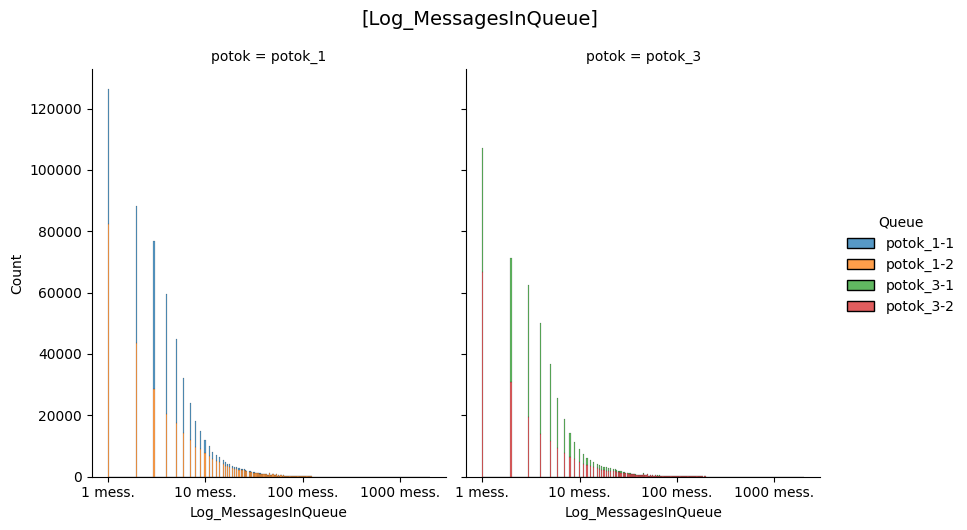

In [85]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_filtered,
    x=VARIABLE,
    hue="Queue",
#     kde=True,
    hue_order=HUE_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85,
    multiple="stack"
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2, 3], xticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
g.fig.suptitle(f"[{VARIABLE}]", fontsize=14, y=1.05)
# Show the plot
try:
        # Show the plot with default settings
    plt.show()
except LinAlgError:
    # Add regularization to the covariance matrix and show the plot again
    cov = np.cov(data.T) + np.eye(data.shape[1]) * 1e-8
    inv_cov = np.linalg.inv(cov)
    plt.show()

potok_1-1


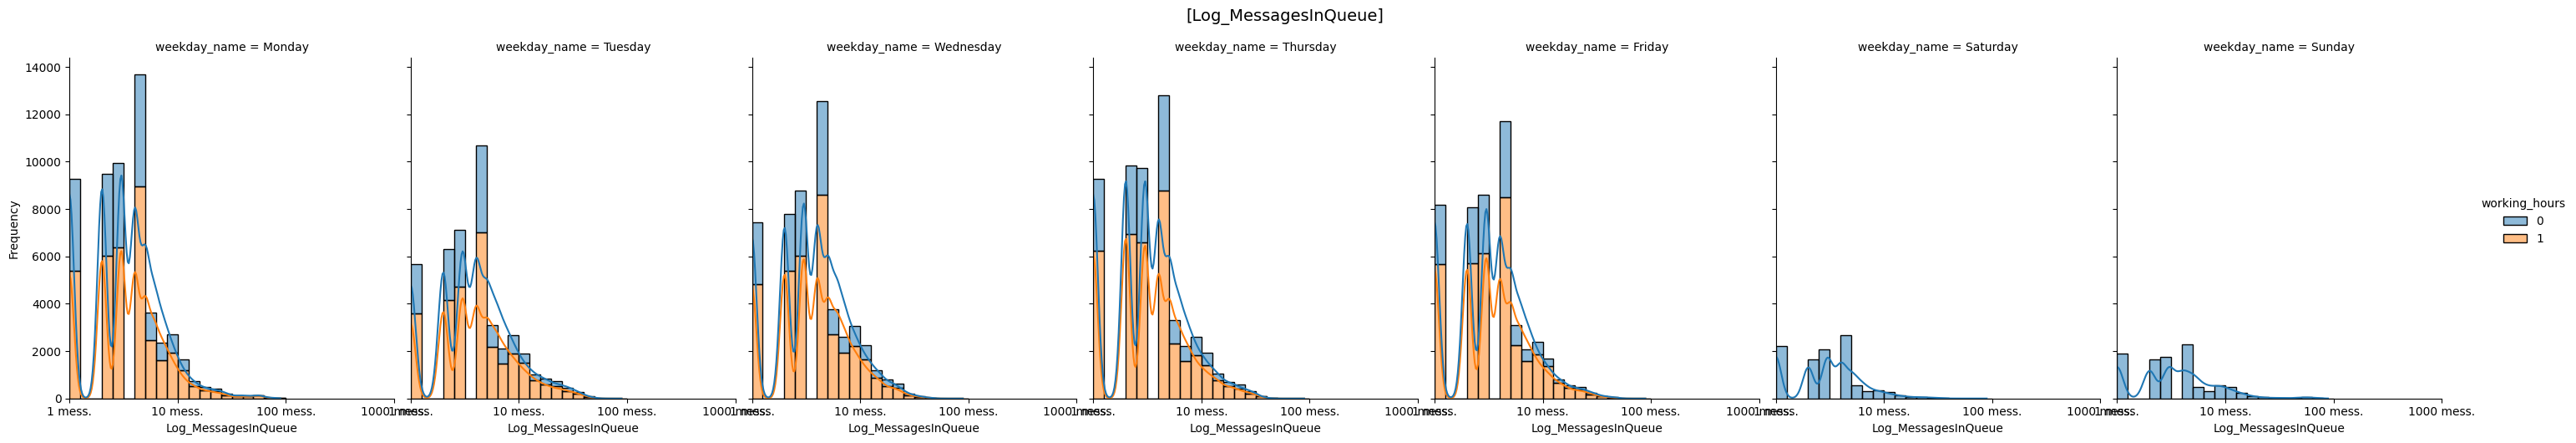

potok_1-2


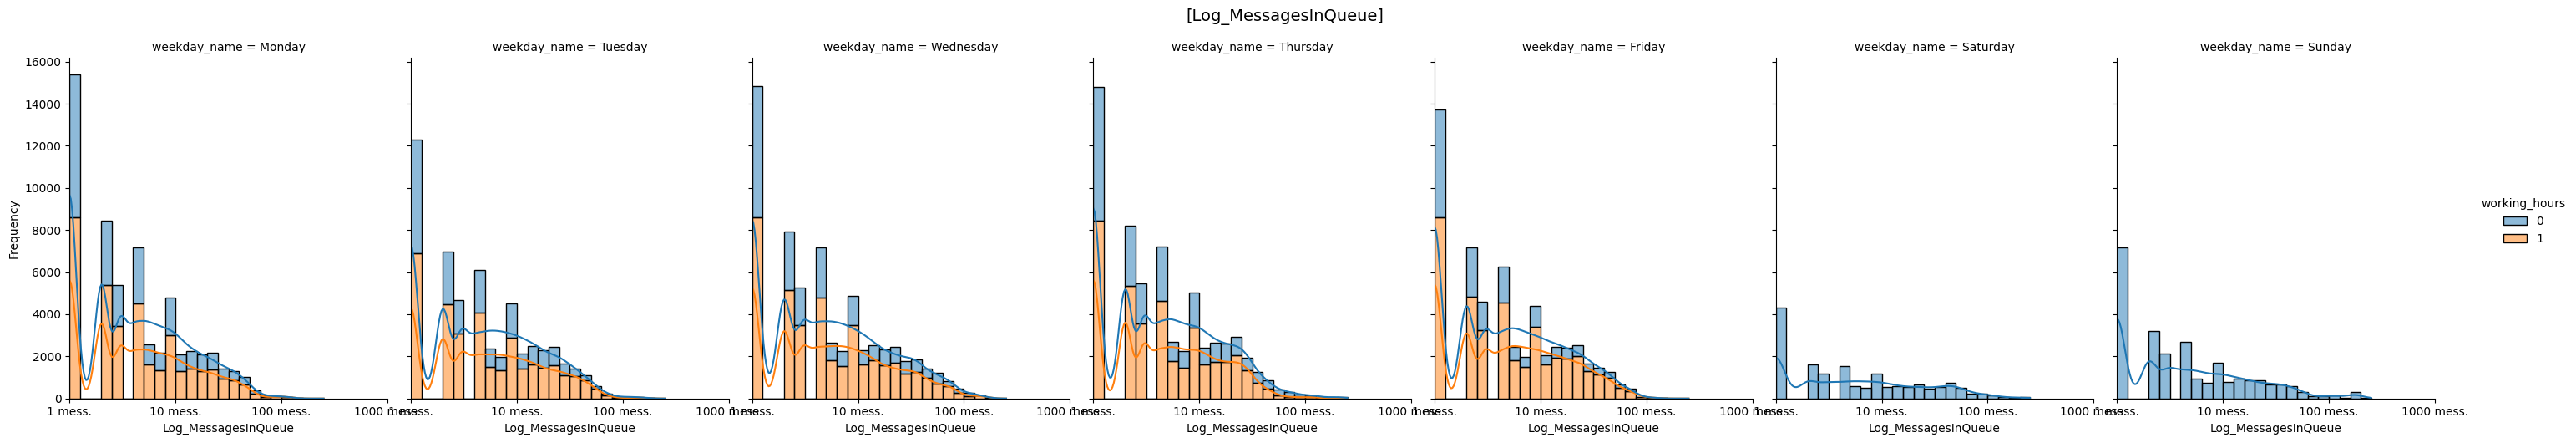

potok_3-1


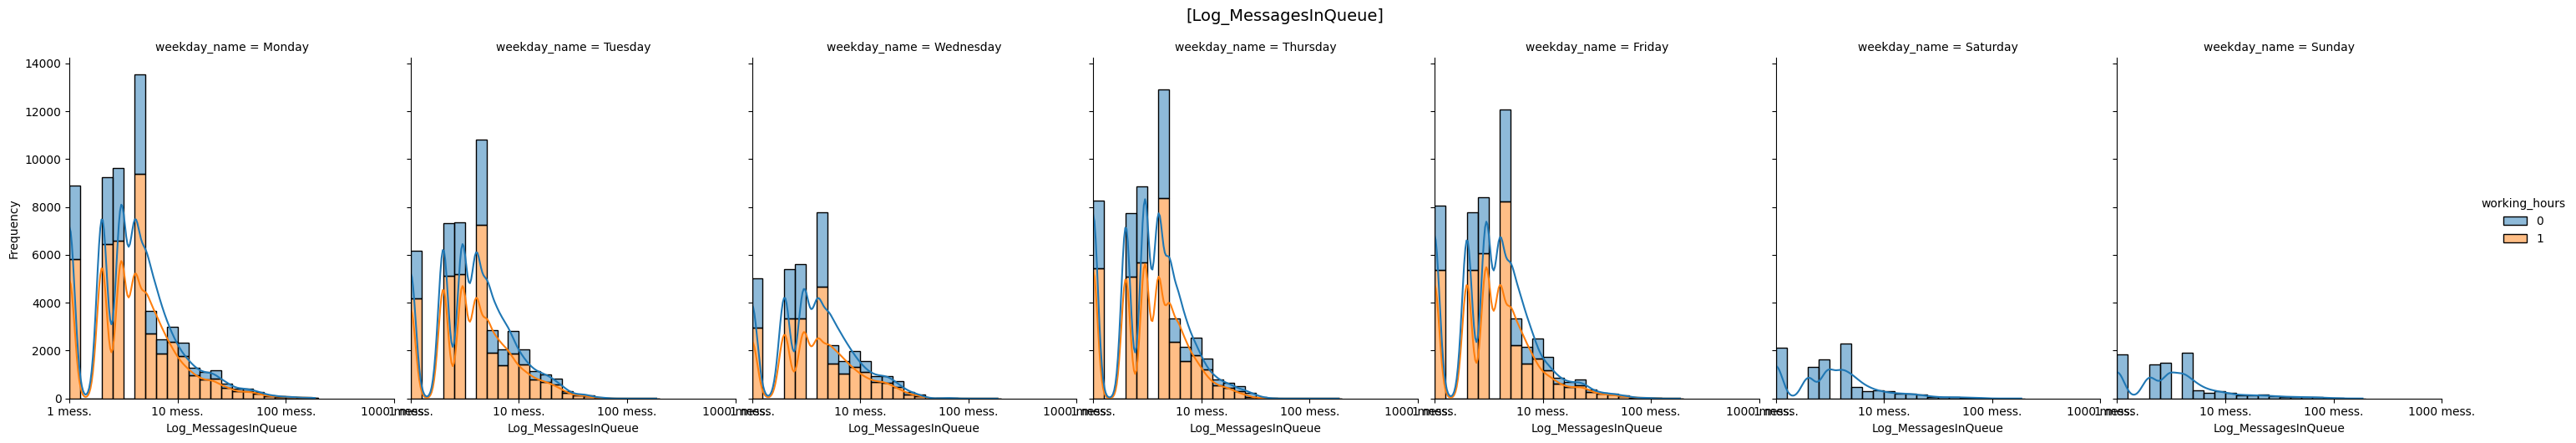

potok_3-2


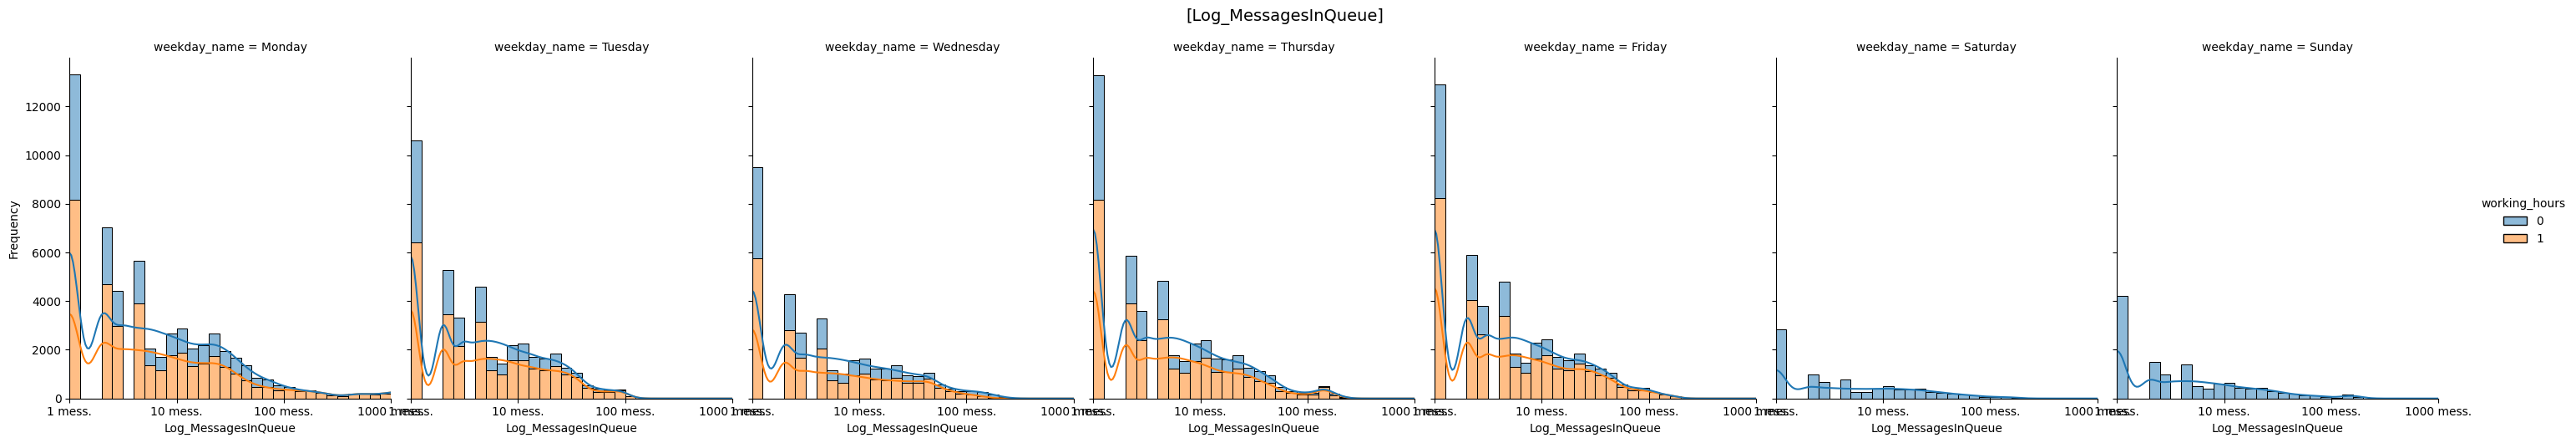

In [81]:
from numpy.linalg import LinAlgError

# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df_filtered["Queue"].unique())):
    print(v)
    g = sns.displot(
        data=df_filtered[df_filtered["Queue"] == v],
        x=VARIABLE,
        hue="working_hours",
        kde=True,
#         hue_order=HUE_ORDER,
        col="weekday_name",
        col_order=WEEKDAY_ORDER,
        aspect=.85,
        multiple="stack",
        binwidth=0.1  # reduce the binwidth to reduce empty spaces between bars
    )

    # Customize the plot
    g.set(xlim=(0, 3), xlabel=VARIABLE, ylabel="Frequency")
    g.set(xticks=[0, 1, 2, 3], xticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
    g.fig.suptitle(f"[{VARIABLE}]", fontsize=14, y=1.05)
    
    try:
        # Show the plot with default settings
        plt.show()
    except LinAlgError:
        # Add regularization to the covariance matrix and show the plot again
        cov = np.cov(data.T) + np.eye(data.shape[1]) * 1e-8
        inv_cov = np.linalg.inv(cov)
        plt.show()


In [59]:
# # Create a histogram with groupings based on Order Year
# g = sns.displot(
#     data=df_filtered,
#     x=VARIABLE,
#     hue="weekday_name",
# #     kde=True,
#     hue_order=WEEKDAY_ORDER,
#     col="potok",
#     col_order=COL_ORDER,
#     aspect=.85    
# )

# # Customize the plot
# # g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
# g.set(xticks=[0, 1, 2, 3], xticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
# g.fig.suptitle(f"[{VARIABLE}]", fontsize=14, y=1.05)
# # Show the plot
# plt.show()

In [63]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df_filtered["weekday"].unique())):
    print(v)
    g = sns.displot(
        x=VARIABLE,
        hue="working_hours",
        kde=True,
#         hue_order=WEEKDAY_ORDER,
        col="Queue",
        col_order=HUE_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 100), xlabel=VARIABLE, ylabel="Frequency")
    g.set(xticks=[0, 1, 2, 3], xticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
    g.fig.suptitle(f"[{VARIABLE}]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

1


ValueError: Could not interpret value `Log_MessagesInQueue` for parameter `x`

## BOX PLOTS

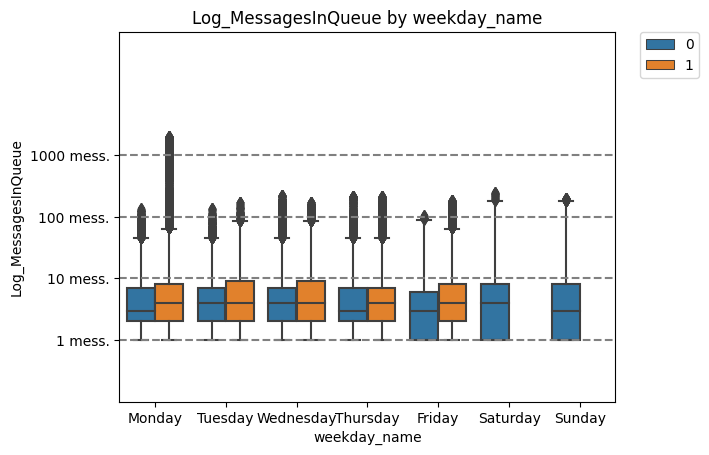

In [68]:
# Create a box plot with groupings based on Order Year
g = sns.boxplot(data=df_filtered, x="weekday_name", y=VARIABLE, hue="working_hours", order=WEEKDAY_ORDER)

# Customize the plot
g.set(ylim=(-1, 5), xlabel="weekday_name", ylabel=VARIABLE, title=f"{VARIABLE} by weekday_name")


g.set(yticks=[0, 1, 2, 3], yticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
# Move the legend outside the chart box
# Add horizontal lines at each ytick
yticks = plt.yticks()[0]
for ytick in yticks:
    plt.axhline(ytick, color='gray', linestyle='--')

# Move the legend outside the chart box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

February
March


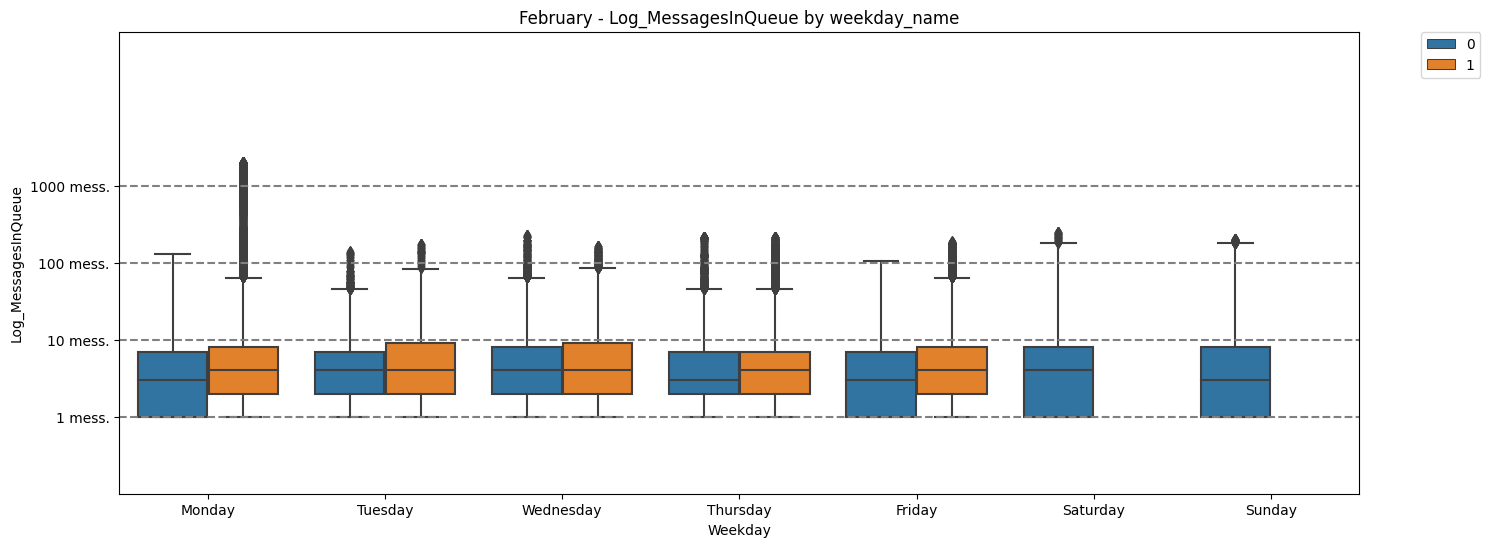

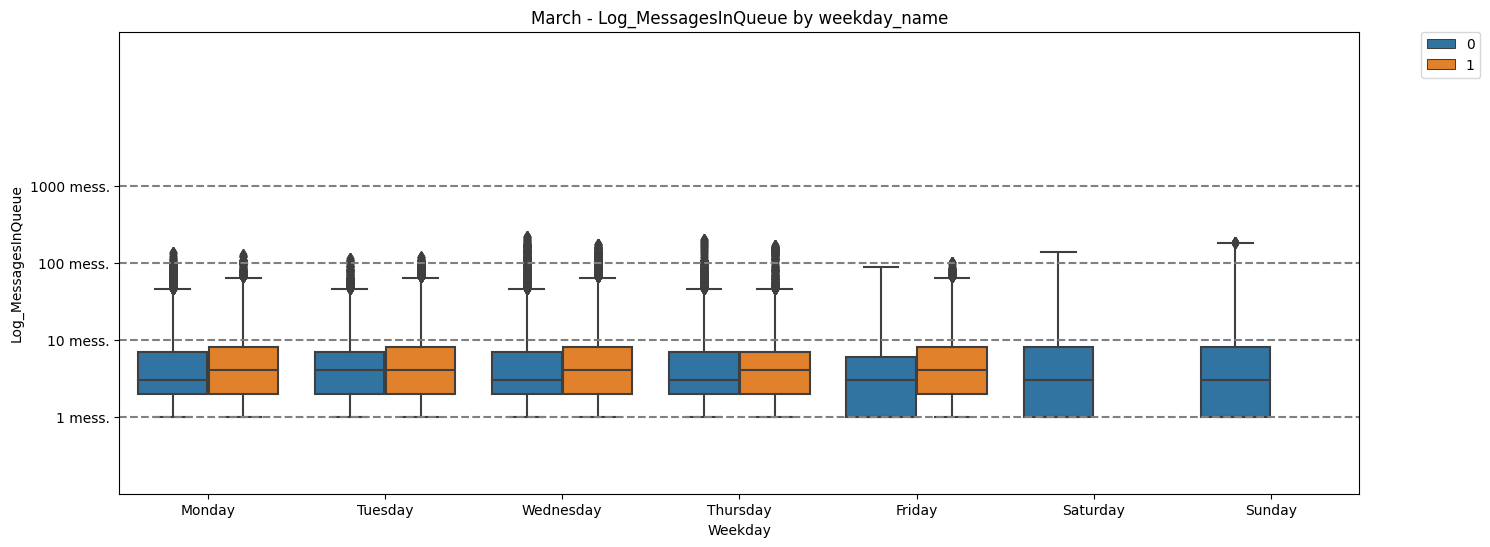

In [70]:
for i, v in enumerate(sorted(df_filtered["month_name"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_filtered[df_filtered["month_name"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_filtered[df_filtered["month_name"] == v], x="weekday_name", y=VARIABLE, hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel=VARIABLE, title=f"{v} - {VARIABLE} by weekday_name")
        g.set(yticks=[0, 1, 2, 3], yticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [71]:
for i, v in enumerate(sorted(c["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_filtered[df_filtered["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_filtered[df_sample["week"] == v], x="weekday_name", y=VARIABLE, hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel=VARIABLE, title=f"Week {v} - {VARIABLE} by weekday_name")
        g.set(yticks=[0, 1, 2, 3], yticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1600x600 with 0 Axes>

5
6
7
8
9
10
11
12
13


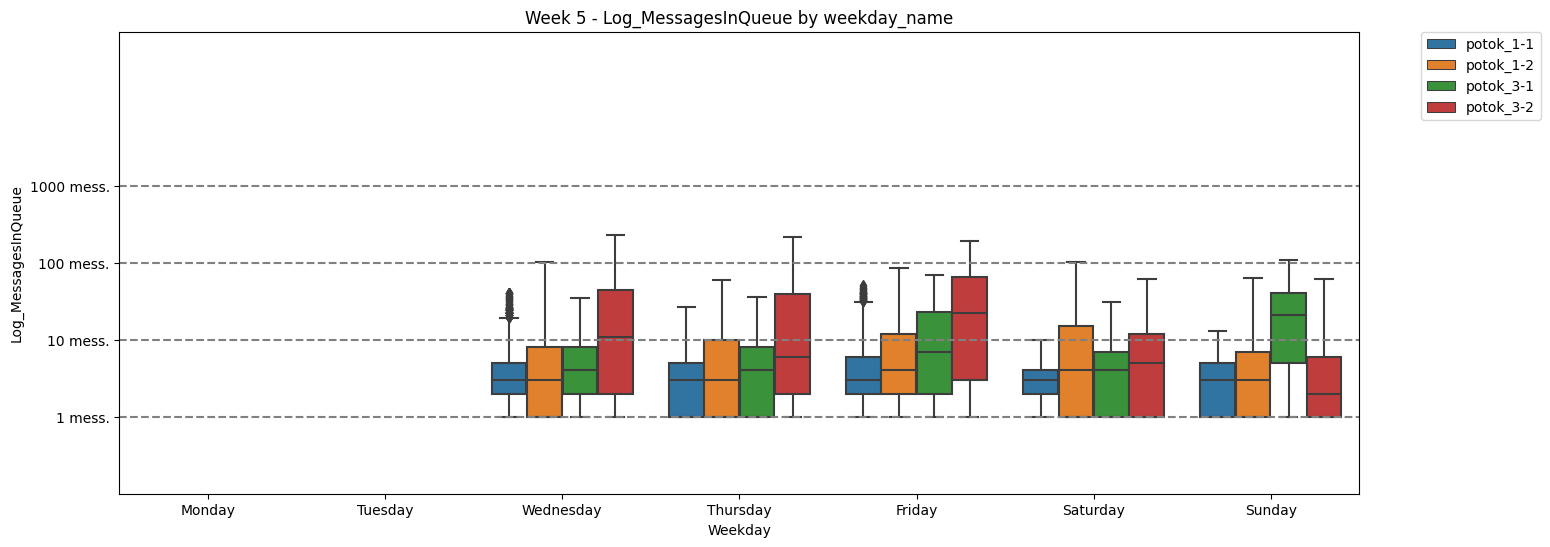

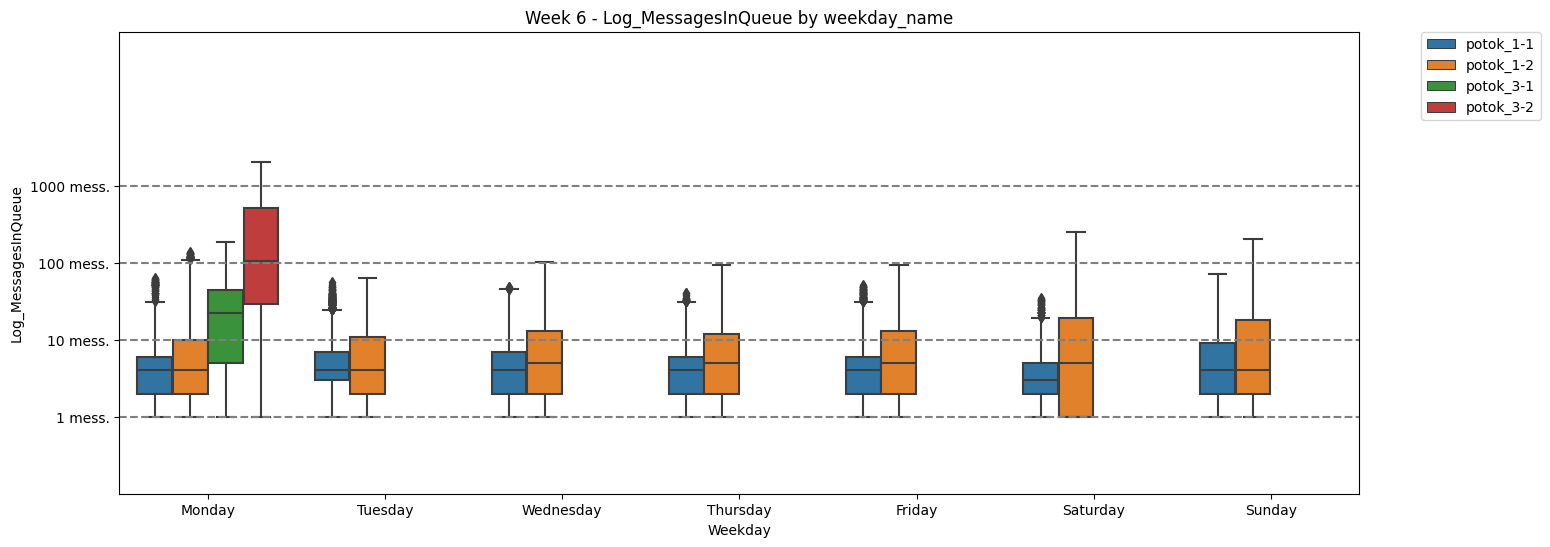

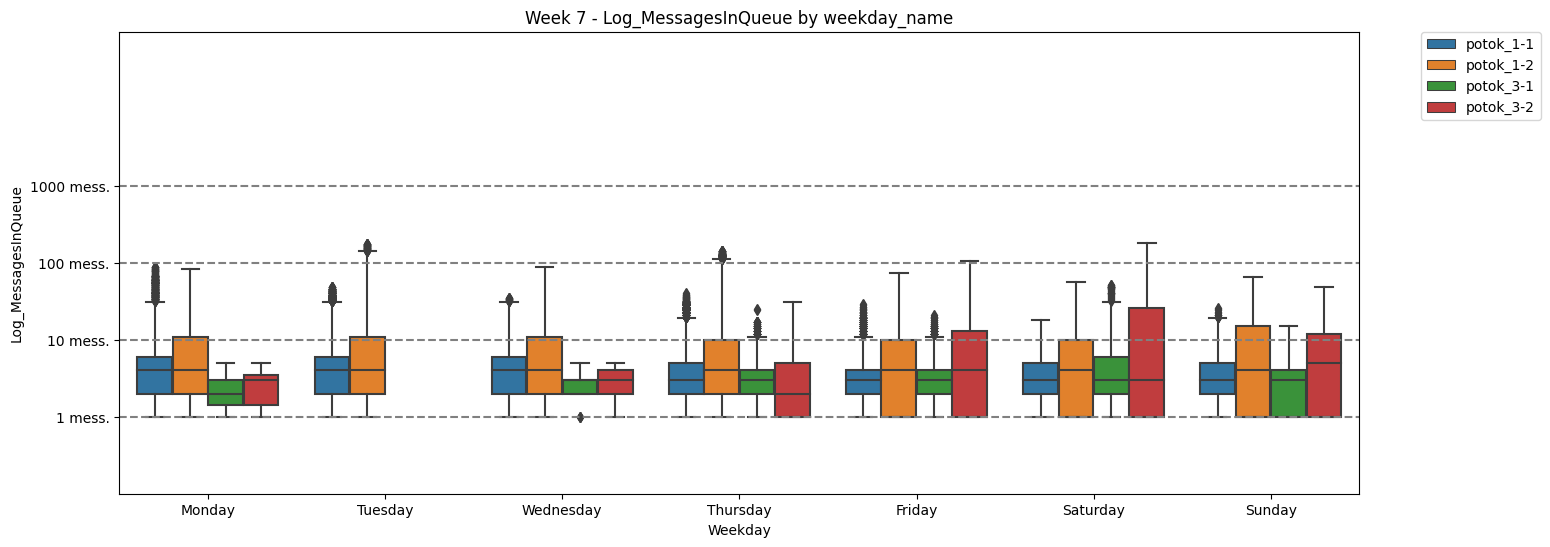

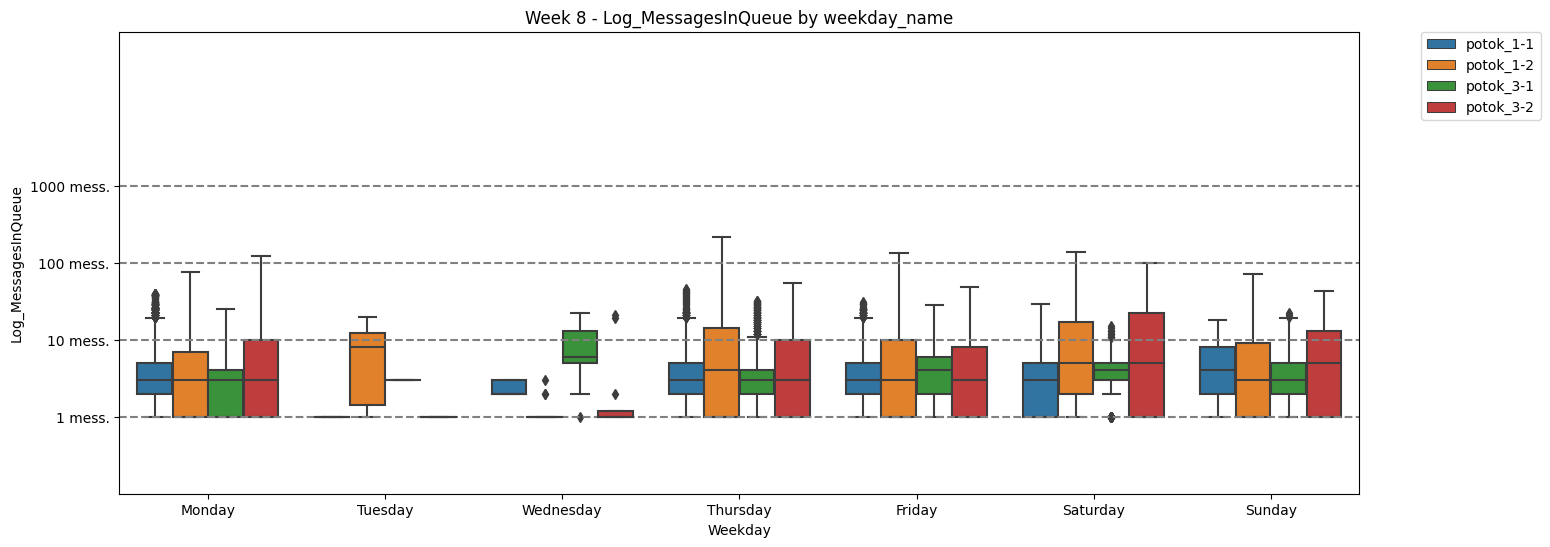

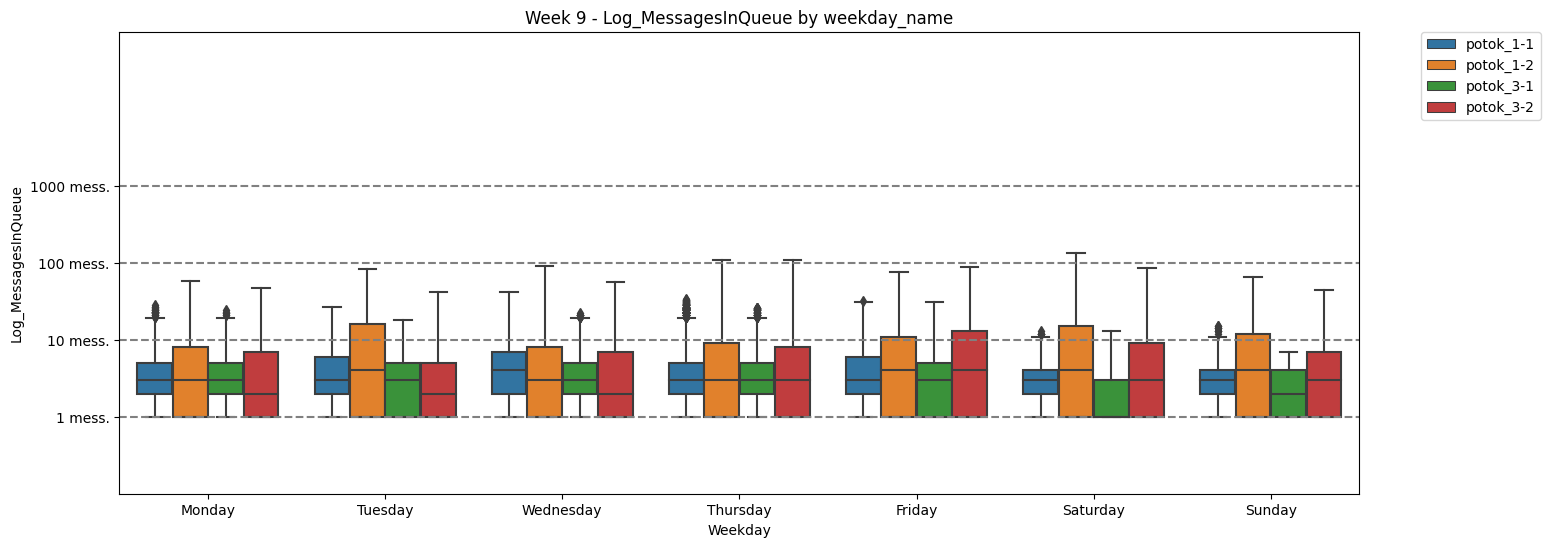

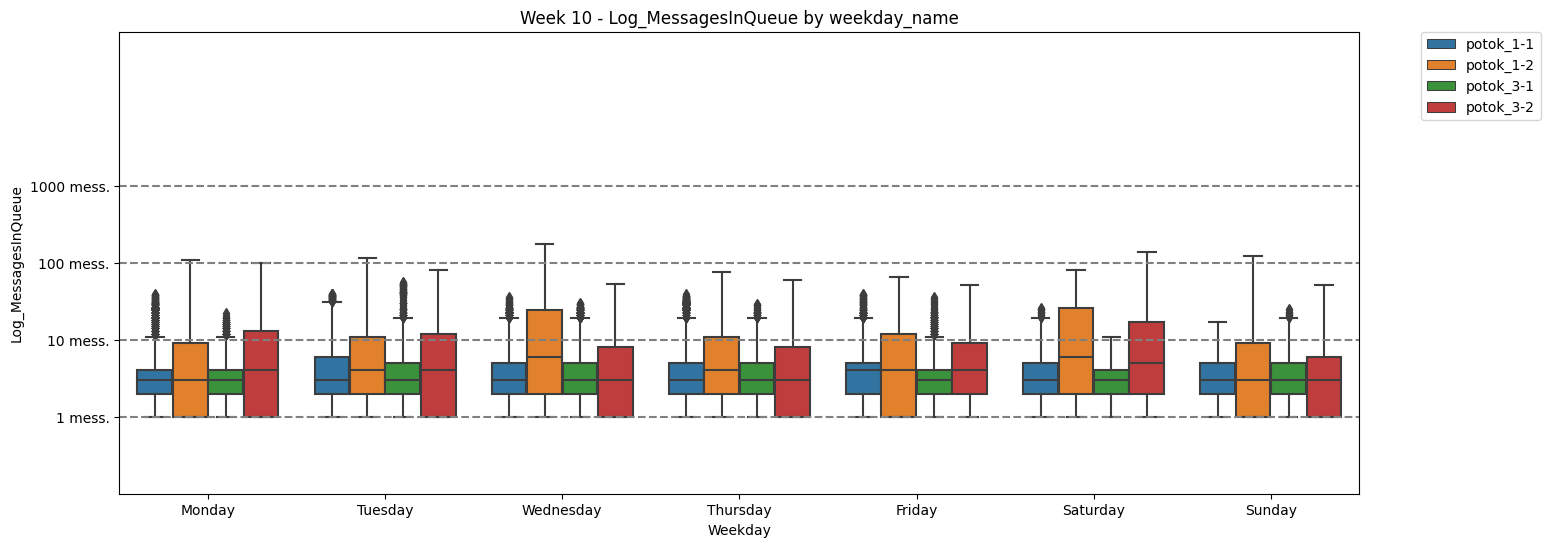

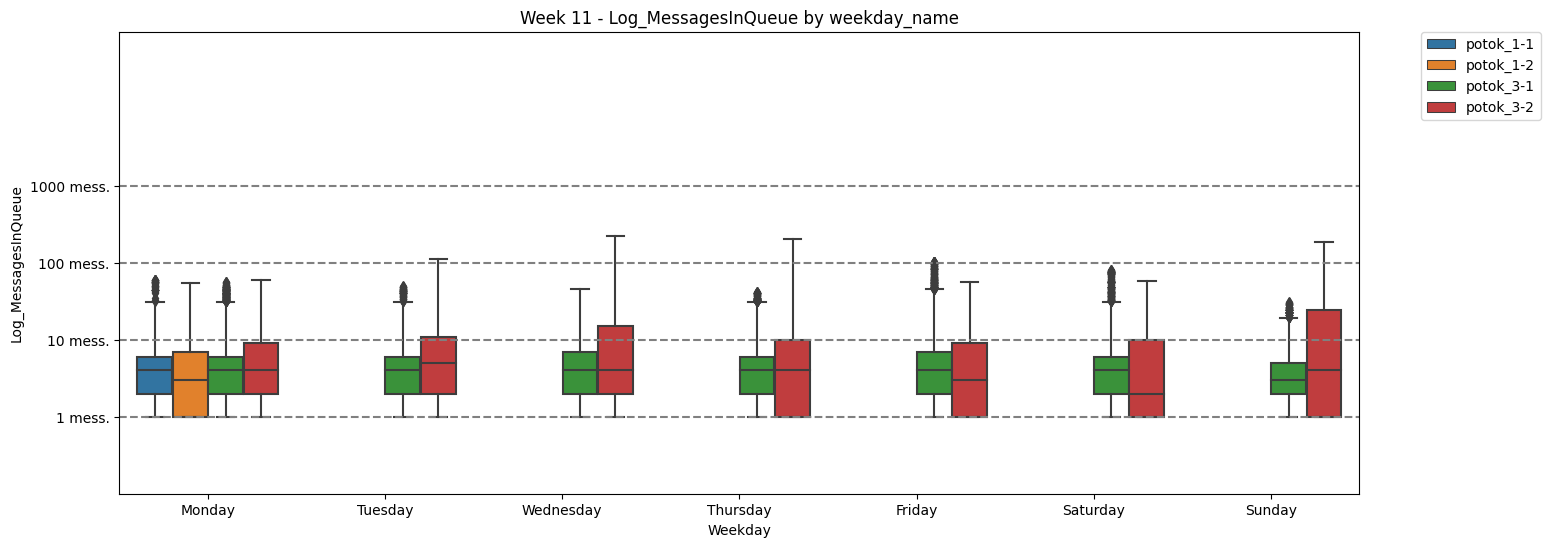

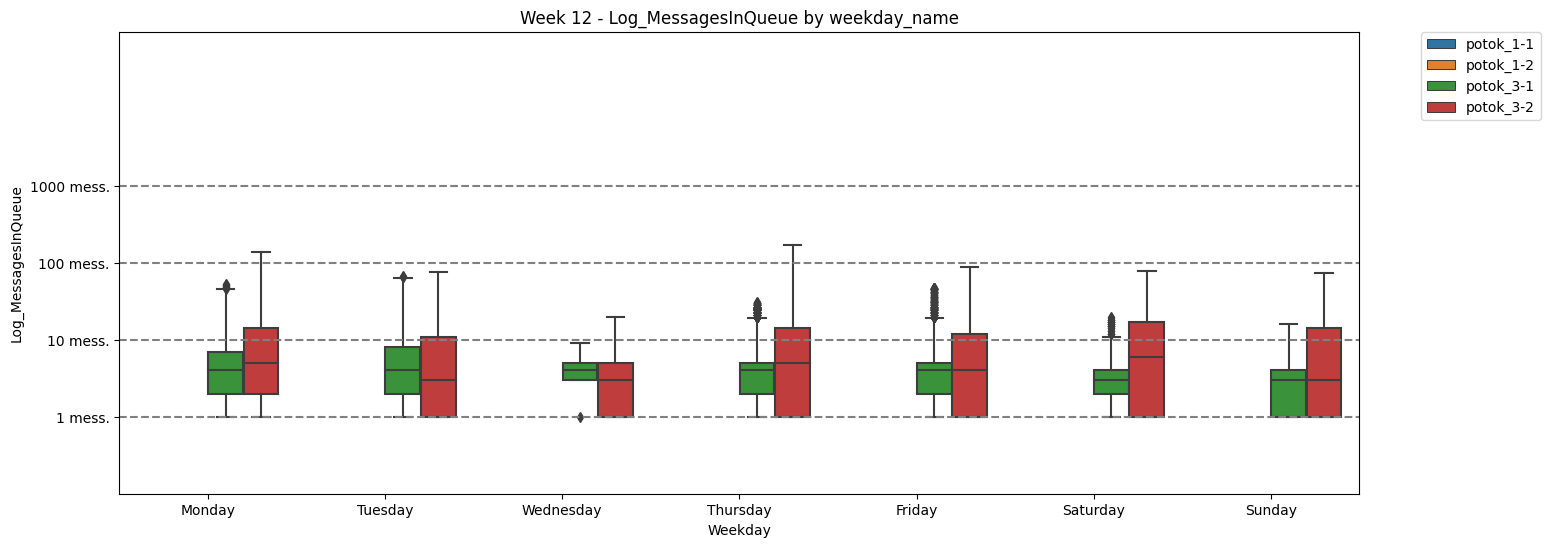

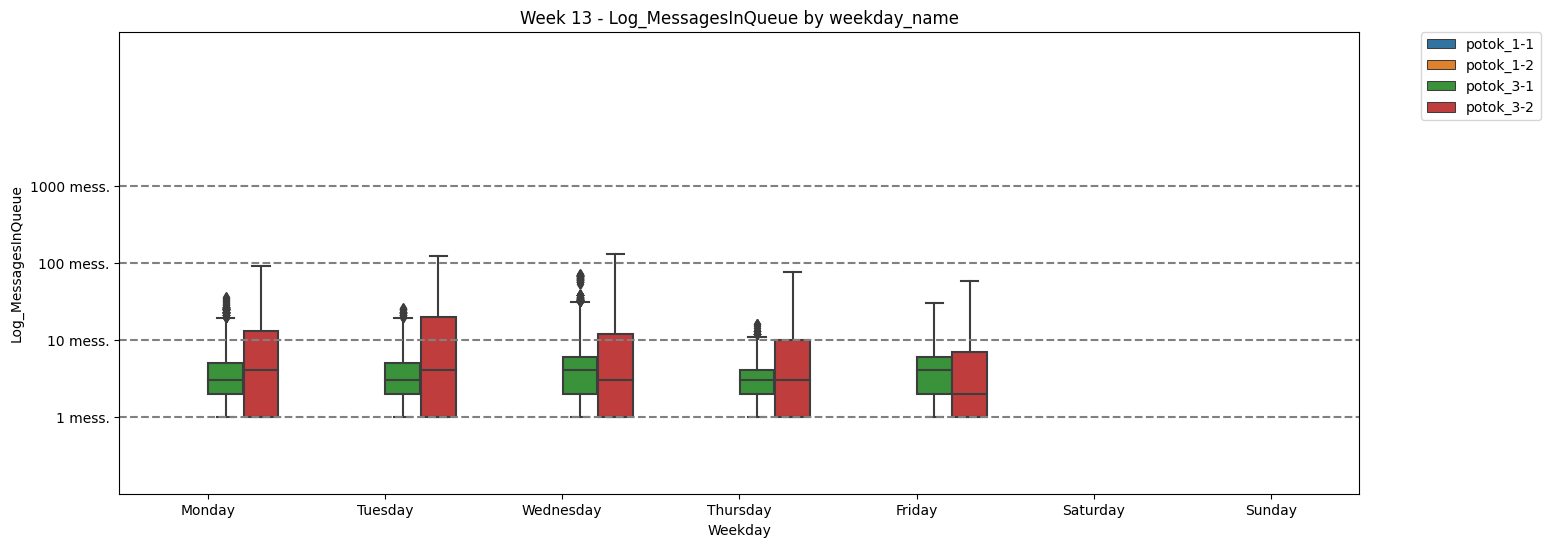

In [95]:
for i, v in enumerate(sorted(df_filtered["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_filtered[df_filtered["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_filtered[df_filtered["week"] == v], x="weekday_name", y=VARIABLE, order=WEEKDAY_ORDER, hue="Queue", hue_order=HUE_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel=VARIABLE, title=f"Week {v} - {VARIABLE} by weekday_name")
        g.set(yticks=[0, 1, 2, 3], yticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5
6
7
8
9
10
11
12
13


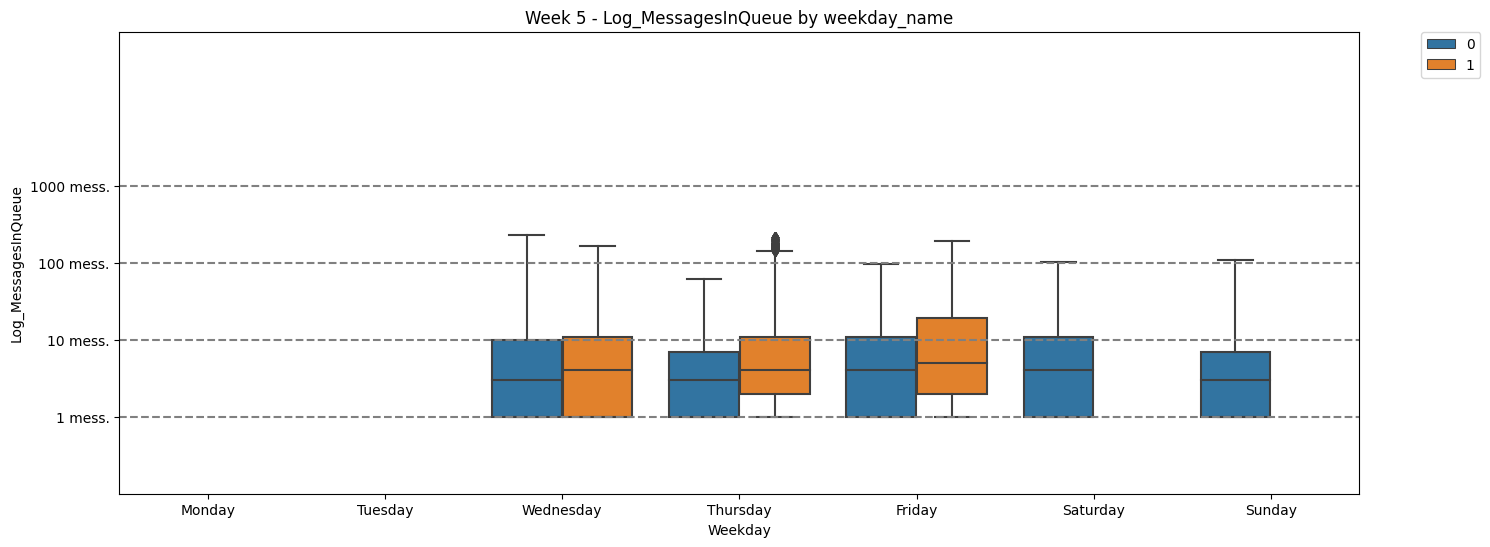

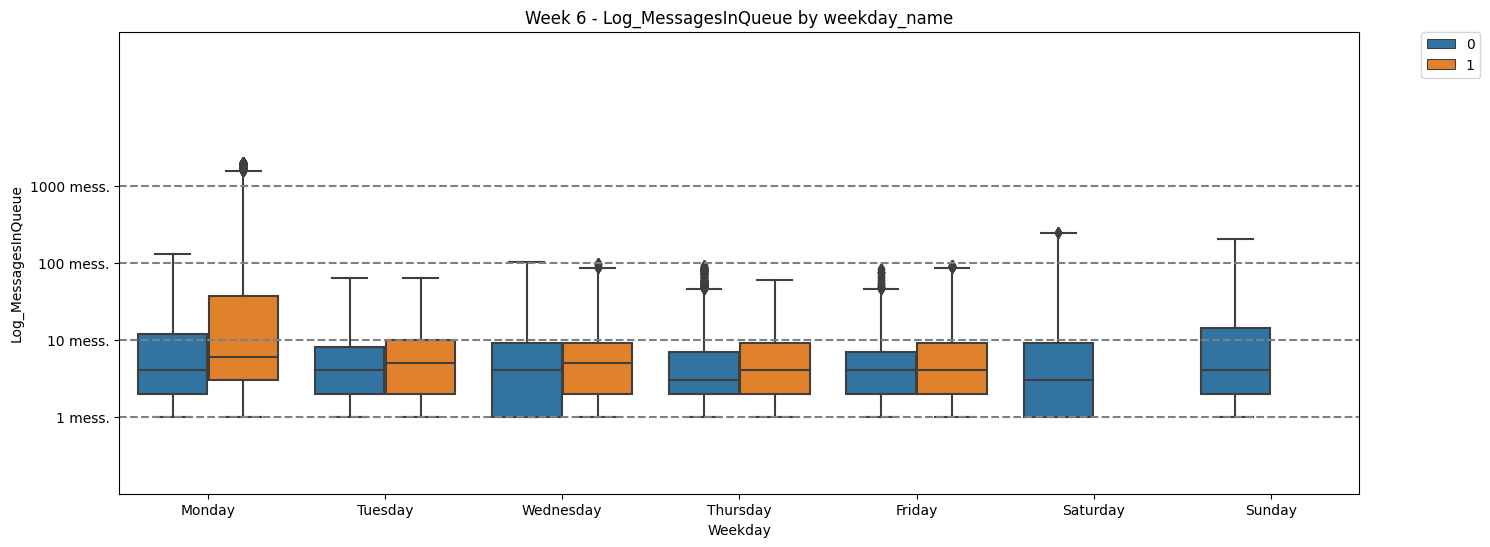

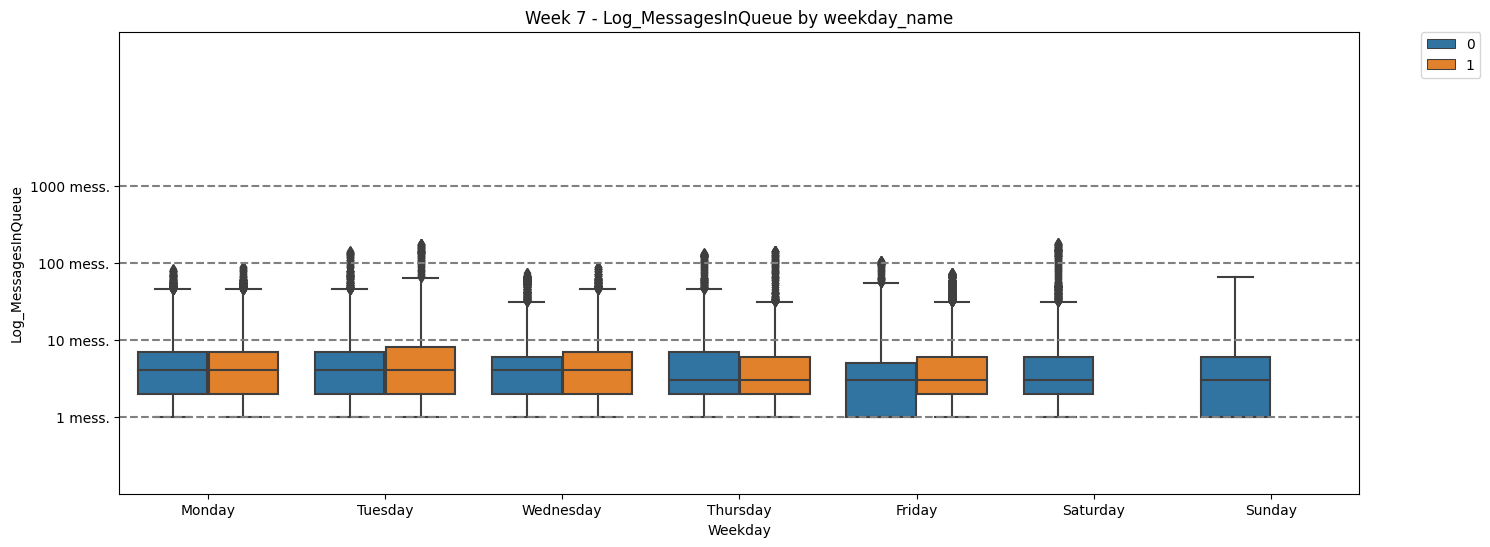

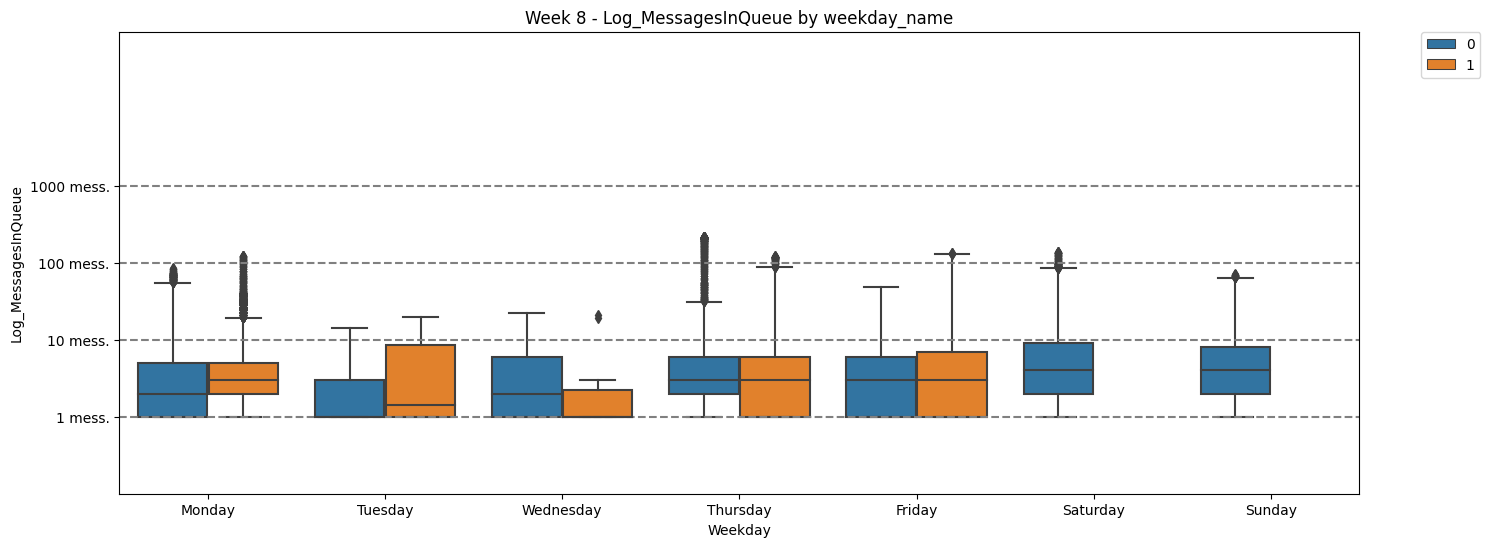

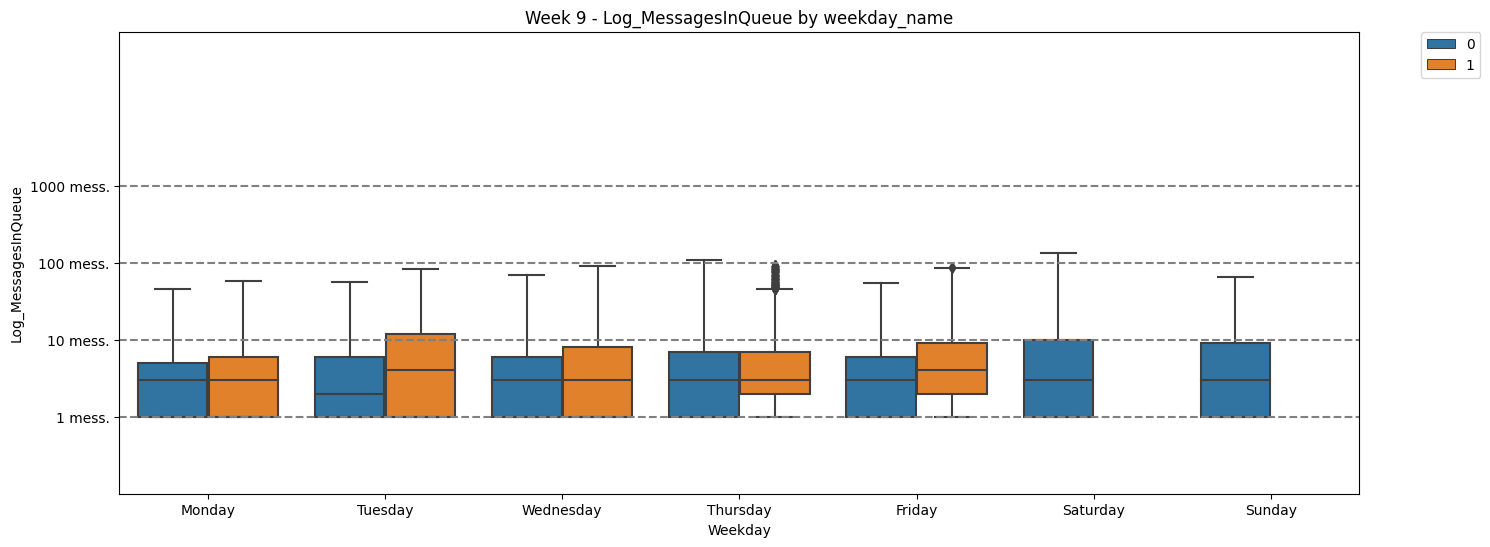

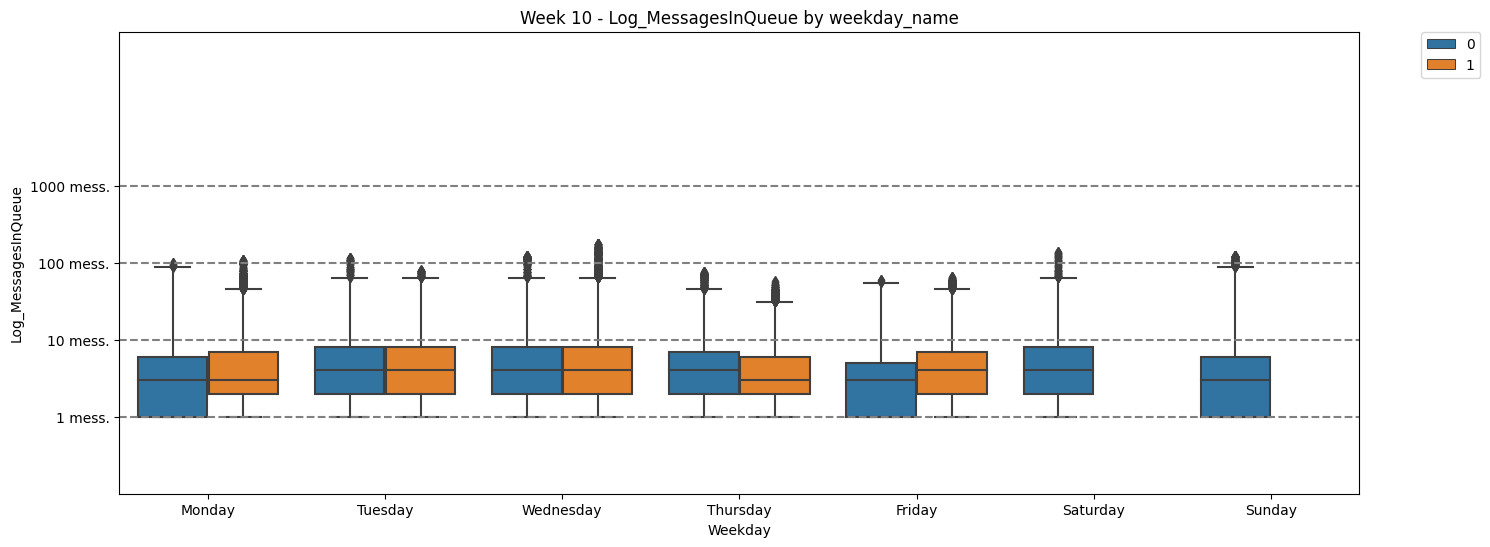

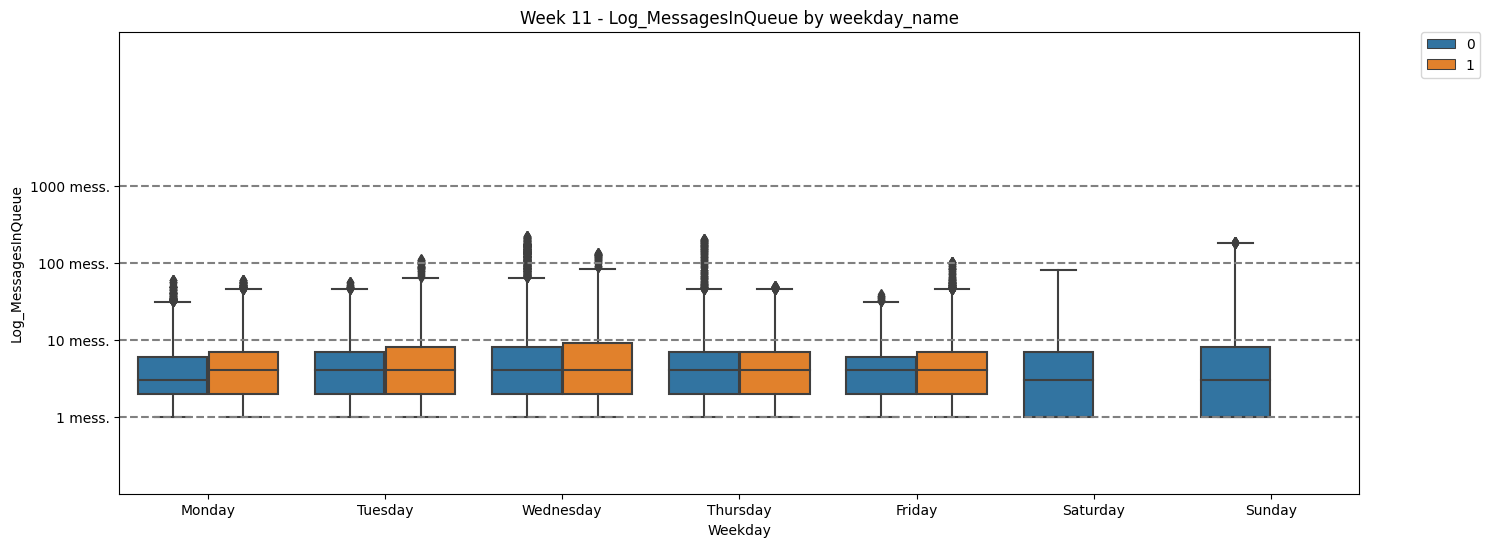

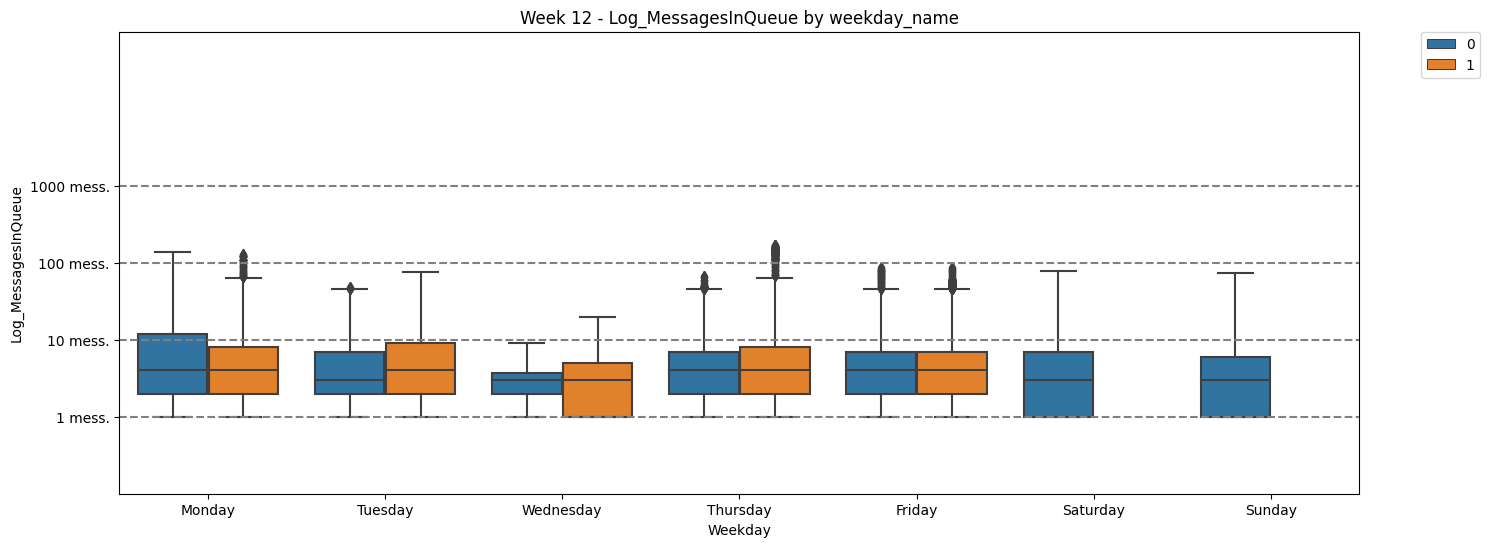

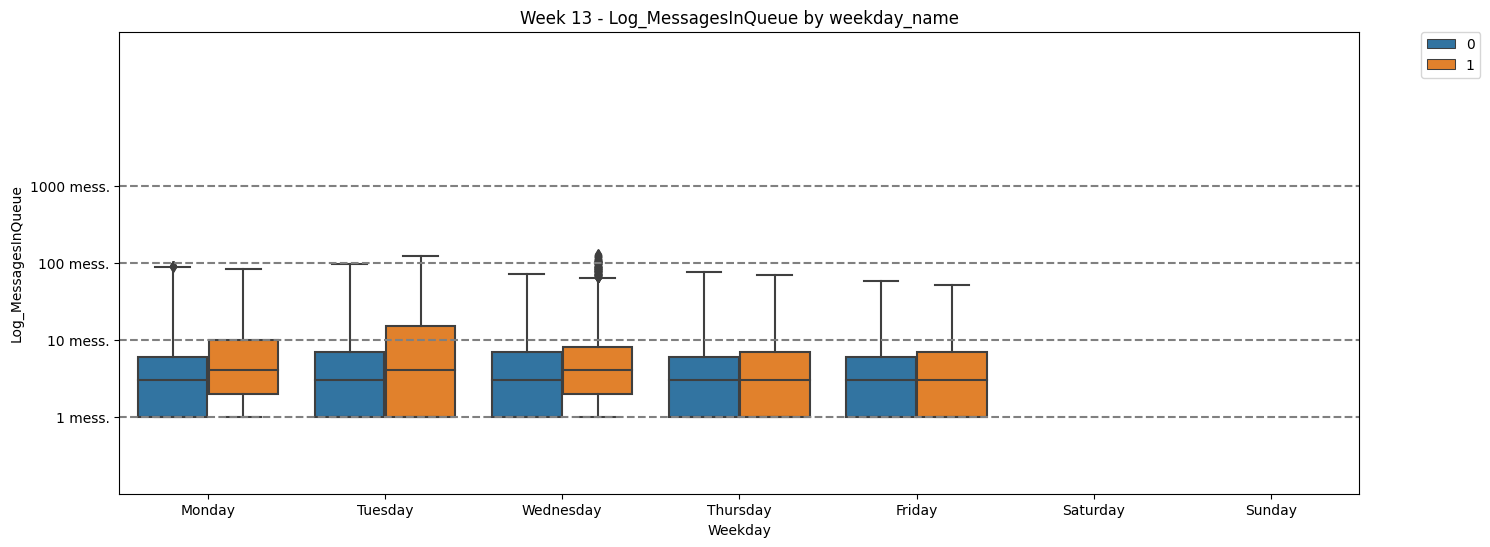

In [73]:
for i, v in enumerate(sorted(df_filtered["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_filtered[df_filtered["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_filtered[df_filtered["week"] == v], x="weekday_name", y=VARIABLE, order=WEEKDAY_ORDER, hue="working_hours")

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel=VARIABLE, title=f"Week {v} - {VARIABLE} by weekday_name")
        g.set(yticks=[0, 1, 2, 3], yticklabels=["1 mess.", "10 mess.", "100 mess.", "1000 mess."])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


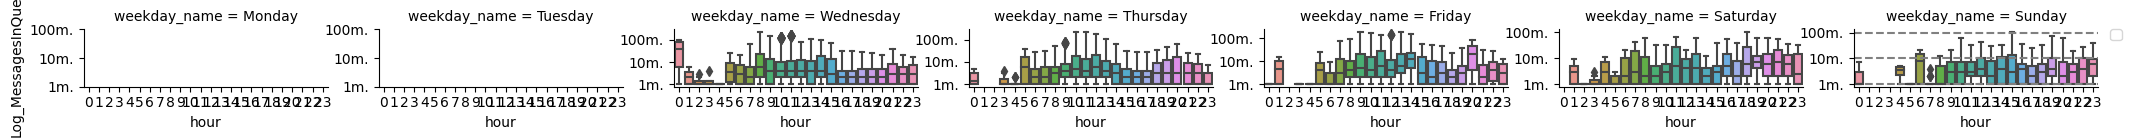

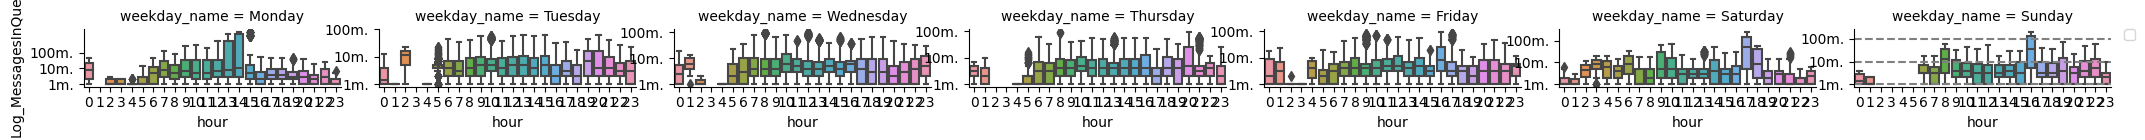

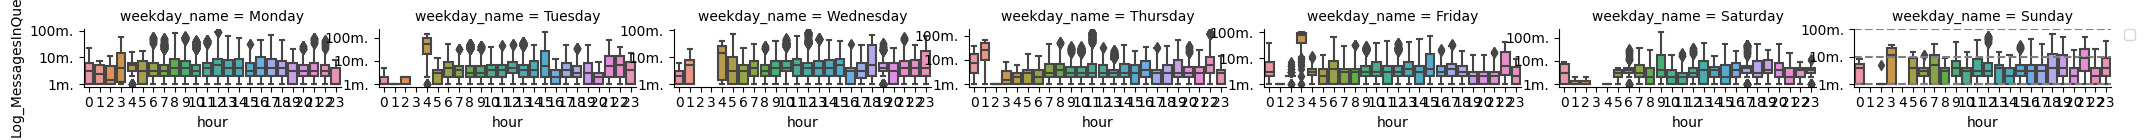

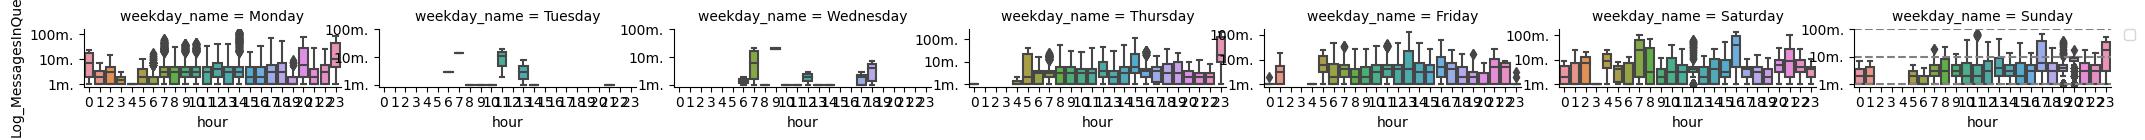

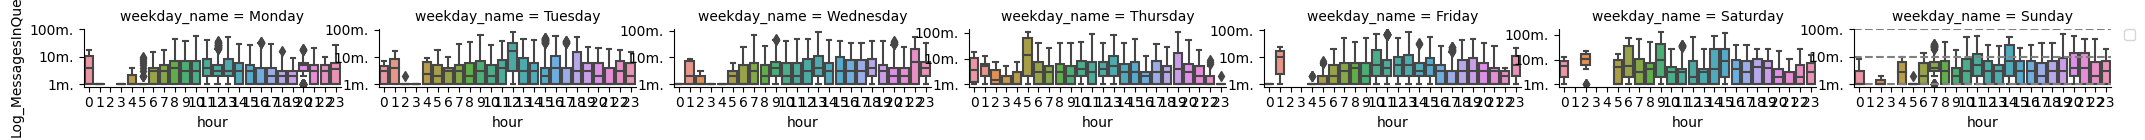

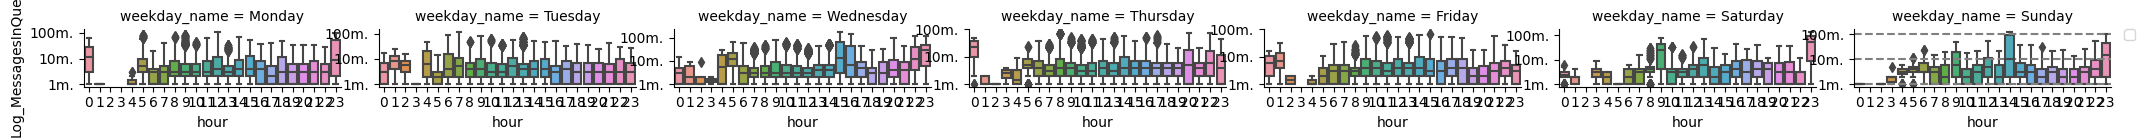

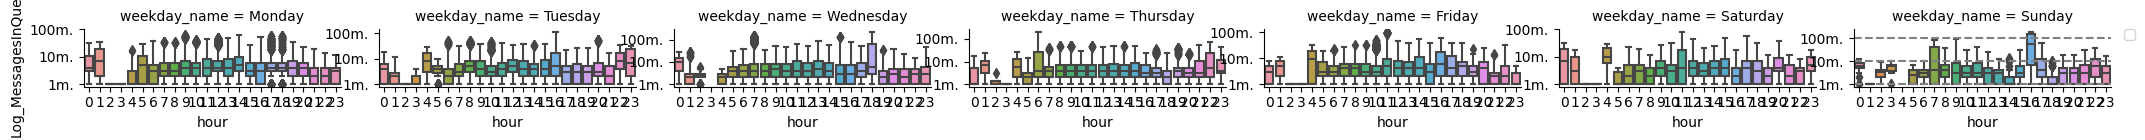

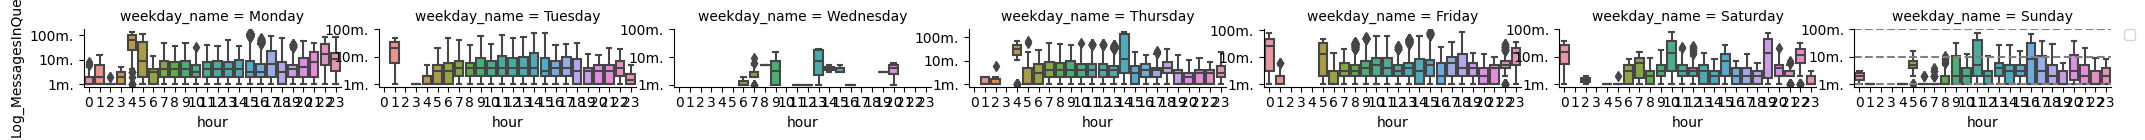

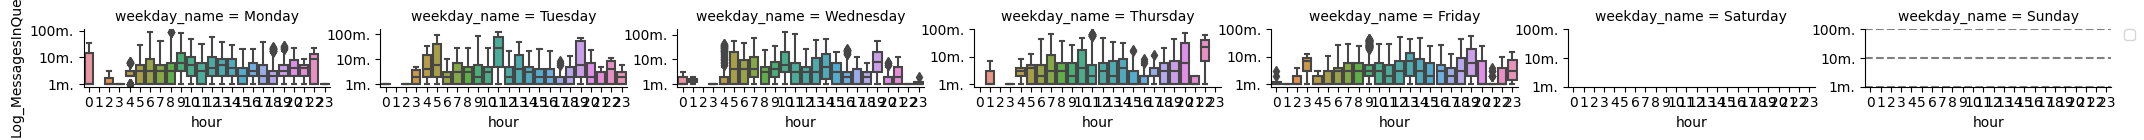

In [75]:
for i, v in enumerate(sorted(df_filtered["week"].unique())):
    print(v)
    if not df_filtered[df_filtered["week"] == v].empty:
        g = sns.catplot(
            data=df_filtered[df_filtered["week"] == v],
            kind="box",
            x="hour",
#             order=WEEKDAY_ORDER,
            y=VARIABLE,
#             hue="hour",
            col="weekday_name",
            col_order=WEEKDAY_ORDER,
            row_order=sorted(df_filtered["hour"].unique()),
            aspect=2, height=1.5, sharey=False, legend_out=False,
        )
        g.set(yticks=[0, 1, 2], yticklabels=["1m.", "10m.", "100m."])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## SWARM PLOTS

In [ ]:
df_sample = df.sample(frac=0.005, replace=False)
df_sample

In [ ]:
g = sns.catplot(
    data=df_sample, kind="swarm",
    x="weekday_name", order=WEEKDAY_ORDER, y=VARIABLE, hue="Queue", hue_order=sorted(df["Queue"].unique()), col="week", aspect=.85
)
g.set(ylim=(0, 3))
g.fig.suptitle(f"[Winsorized Sales]", fontsize=14, y=1.05)

In [ ]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)
    g = sns.catplot(
        data=df_sample,
        kind="swarm",
#         x="hour",
#         order=sorted(df["hour"].unique()),
        x="weekday_name",
        order=WEEKDAY_ORDER,
        y=VARIABLE,
#         col="weekday_name",
#         col_order=sorted(df["weekday_name"].unique()),
        col="hour",
        col_order=sorted(df["hour"].unique()),
        hue="Queue",
        hue_order=sorted(df["Queue"].unique()),
        aspect=.85
    )
    g.set(ylim=(0, 3))
    g.fig.suptitle(f"Week: {v}", fontsize=14, y=1.05)

In [ ]:
df_sample

## LINE PLOTS

## Months X Days

In [ ]:
# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]
    
    grouped_data = queue_data.groupby(['Queue', 'month_name', 'weekday_name']).agg(
    quantity=(VARIABLE, 'count'),
    Mean_Log_Duration_sec=(VARIABLE, 'mean'),
    Sum_Log_Duration_sec=(VARIABLE, 'sum')
    ).reset_index()

    # Pivot the data to create a table with months as rows and years as columns
#     pivot_data = pd.pivot_table(queue_data, values="Sum_Log_Duration_sec", index="month_name", columns="year", aggfunc=np.sum)
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['month_name'],
        columns=['weekday_name'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Month for all Queues and Years")

# Show the plot
plt.show()


## Months X Hours

In [ ]:
# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]
    
    grouped_data = queue_data.groupby(['Queue', 'month_name', 'hour']).agg(
    quantity=(VARIABLE, 'count'),
    Mean_Log_Duration_sec=(VARIABLE, 'mean'),
    Sum_Log_Duration_sec=(VARIABLE, 'sum')
    ).reset_index()

    # Pivot the data to create a table with months as rows and years as columns
#     pivot_data = pd.pivot_table(queue_data, values="Sum_Log_Duration_sec", index="month_name", columns="year", aggfunc=np.sum)
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['month_name'],
        columns=['hour'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Hour for all Queues and Months")

# Show the plot
plt.show()


## Days X Hours

In [ ]:
# Define the desired order of weekdays
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]

# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]

    # Convert "weekday_name" to categorical variable with the desired order
    weekday_cat = pd.Categorical(
        queue_data["weekday_name"],
        categories=weekday_order,
        ordered=True
    )

    # Group the data by "Queue", "weekday_name", and "hour", with the desired weekday order
    grouped_data = queue_data.groupby(['Queue', weekday_cat, 'hour']).agg(
        quantity=(VARIABLE, 'count'),
        Mean_Log_Duration_sec=(VARIABLE, 'mean'),
        Sum_Log_Duration_sec=(VARIABLE, 'sum')
    ).reset_index()
    
    # Sort the data by weekday_name using the weekday_order
#     grouped_data = grouped_data.reindex(weekday_order, level=1)
    
    # Pivot the data to create a table with months as rows and years as columns
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['level_1'],
        columns=['hour'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Hour for all Queues and Weekdays")

# Show the plot
plt.show()
